In [1]:
import sys

sys.path.append("..")
import random
from PIL import Image
import requests
from segment.utils import *
import yaml
from diffusers.utils import load_image, make_image_grid
import numpy as np
from ultralytics import YOLO
from segment.sam_results import SAMResults
from datasets import load_dataset
import random

yaml_file = "../configs/fashion_people_detection_no_person.yml"
with open(yaml_file, "r") as f:
    config = yaml.safe_load(f)

labels_dict = config.get("names")
labels_dict_reversed = {v: k for k, v in labels_dict.items()}

### A test notebook for seeing the results of a model after training

In [2]:
def unload(result):
    masks = result.masks.data
    boxes = result.boxes.xyxy
    scores = result.boxes.conf

    labels = result.boxes.cls
    labels = [int(label.item()) for label in labels]
    phrases = [labels_dict[label] for label in labels]
    return masks, boxes, scores, phrases

In [4]:
dataset_id = "MnLgt/fashion_people_detections_v2"

ds = load_dataset(
    dataset_id, split="train", trust_remote_code=True, cache_dir="../hf_cache", streaming=True
)

Resolving data files:   0%|          | 0/19 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/19 [00:00<?, ?it/s]

In [5]:
model_path = "/Users/jordandavis/GitHub/resume/HuggingFace/YOLO-Human-Parse/yolo-human-parse-v2.pt"
model = YOLO(model_path, task="segment")

In [6]:
rows = iter(ds)

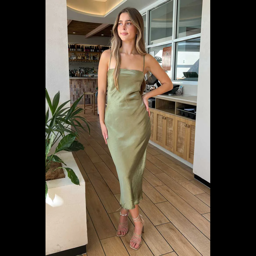

In [11]:
# row_num = random.randint(0, len(ds))
# row_num = 1343

# print(f"Row Num: {row_num}")
row = next(rows)
image = row["image"]
image = resize_image_pil(image, 1024)
image.resize((256, 256))

In [12]:
imgsz = max(image.size)
import os 
import torch
results = model(image, retina_masks=True, imgsz=imgsz)
result = results[0]


0: 1024x1024 1 hair, 1 face, 1 outfit, 2 shoes, 193.4ms
Speed: 3.1ms preprocess, 193.4ms inference, 6.6ms postprocess per image at shape (1, 3, 1024, 1024)


In [ ]:
# 0: 1024x1024 1 hair, 1 face, 2 hands, 2 legs, 1 outfit, 7.2ms

In [ ]:
masks, boxes, scores, phrases = unload(result)
r = SAMResults(
    image,
    labels_dict_reversed,
    masks=masks,
    boxes=boxes,
    scores=scores,
    phrases=phrases,
    person_masks_only=False,
    labels_to_dedupe=None,
    overlap_threshold=0.8,)
r.display_results(prompt_label="label")

In [ ]:
# row = r.get_mask("phone")[0]
# box = row.get('box')
# mask = row.get("mask")
# overlay = overlay_mask(image, mask, opacity=0.9)
# overlay.crop(box).resize((512,512))

In [ ]:
[
    "hair",
    "face",
    "neck",
    "arm",
    "hand",
    "leg",
    "foot",
    "outfit",
    "phone",
    "hat",
    "shoe",
]